In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_fuml_salary_17-18')

In [3]:
rbs.dtypes

NAME          object
FUML           int64
FUML_rank    float64
salary         int64
dtype: object

In [4]:
rbs.head()

,NAME,FUML,FUML_rank,salary
0,Eddie Lacy,0,24.5,4250000
1,Alfred Morris,0,24.5,1750000
2,Shane Vereen,0,24.5,4116667
3,Robert Turbin,0,24.5,1350000
4,Damien Williams,0,24.5,1797000


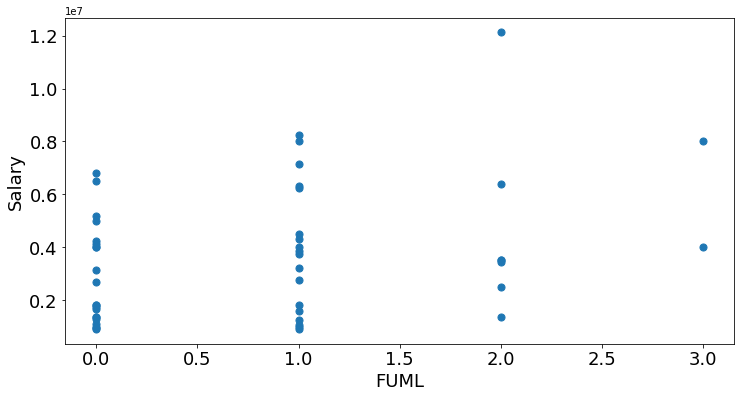

In [5]:
ax = rbs.plot(kind="scatter", x = 'FUML',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUML', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['FUML', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 2.77555756e-17, -7.40148683e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.2478408 , -0.4230879 ],
       [-0.94179503, -0.8866394 ],
       [ 0.84265872,  1.6868563 ],
       [-0.94179503,  0.45564178],
       [ 1.63574927, -0.24263516]])

In [11]:
km.predict(X)

array([3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 4,
       4, 2, 4, 2], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,FUML,FUML_rank,salary,clusters
0,Eddie Lacy,0,24.5,4250000,3
1,Alfred Morris,0,24.5,1750000,1
2,Shane Vereen,0,24.5,4116667,3
3,Robert Turbin,0,24.5,1350000,1
4,Damien Williams,0,24.5,1797000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.00000000e+00, 2.60888885e+06],
       [2.22044605e-16, 1.46644383e+06],
       [1.50000000e+00, 7.80894812e+06],
       [0.00000000e+00, 4.77456056e+06],
       [2.16666667e+00, 3.05362333e+06]])

In [14]:
rbs.groupby('clusters')[['FUML', 'salary']].mean()

,FUML,salary
clusters,,
0,1.000000,2.608889e+06
1,0.000000,1.466444e+06
2,1.500000,7.808948e+06
3,0.000000,4.774561e+06
4,2.166667,3.053623e+06


In [15]:
centroids = rbs.groupby('clusters')[['FUML', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

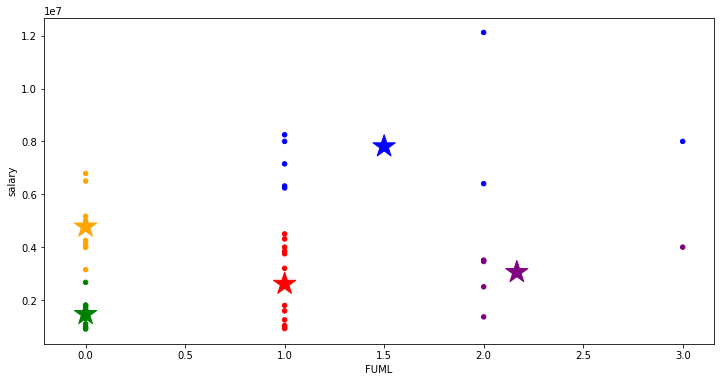

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'FUML', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUML', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

18.09410868674685

In [18]:
silhouette_score(X, km.labels_)

0.5378745693506882